In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline


In [2]:
inp0 = pd.read_csv("googleplaystore.csv")

In [3]:
inp0.head(5)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art_&_Design_Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
inp0.isnull().sum(axis=0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
inp0.dropna(how ='any', inplace = True)

In [8]:
inp0.isnull().sum(axis=0)


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [9]:
inp0['Price'] = inp0.Price.map(lambda x: 0 if x=='0' else float(x[1:]))

In [10]:
inp0.Reviews = inp0.Reviews.astype("int32")

In [11]:
inp0.Reviews.describe()

count    9.360000e+03
mean     5.143767e+05
std      3.145023e+06
min      1.000000e+00
25%      1.867500e+02
50%      5.955000e+03
75%      8.162750e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [12]:
inp0.Installs.value_counts()

Installs
1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: count, dtype: int64

In [13]:
def clean_installs(val):
    return int(val.replace(",","").replace("+",""))

In [14]:
inp0.Installs = inp0.Installs.map(clean_installs)

In [15]:
inp0.Installs.describe()

count    9.360000e+03
mean     1.790875e+07
std      9.126637e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [16]:
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)
        return(x)
    else:
        return None

In [17]:
inp0["Size"] = inp0["Size"].map(change_size)

In [18]:
inp0.Size.describe()

count      7723.000000
mean      22970.456105
std       23449.628935
min           8.500000
25%        5300.000000
50%       14000.000000
75%       33000.000000
max      100000.000000
Name: Size, dtype: float64

In [19]:
inp0.Size.fillna(method = 'ffill', inplace = True)

In [20]:
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price             float64
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [21]:
inp0.Rating.describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [22]:
len(inp0[inp0.Reviews > inp0.Installs])

7

In [23]:
inp0[inp0.Reviews >inp0.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,30000.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1,2.3 and up


In [24]:
inp0 = inp0[inp0.Reviews <= inp0.Installs].copy()

In [25]:
inp0.shape

(9353, 13)

In [26]:
len(inp0[(inp0.Type == "Free") & (inp0.Price>0)])

0

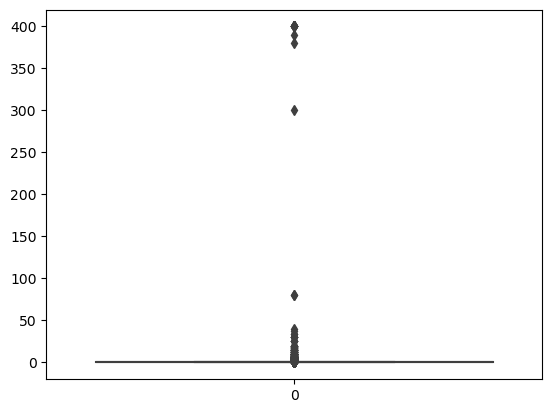

In [27]:
sns.boxplot(inp0.Price)
plt.show()

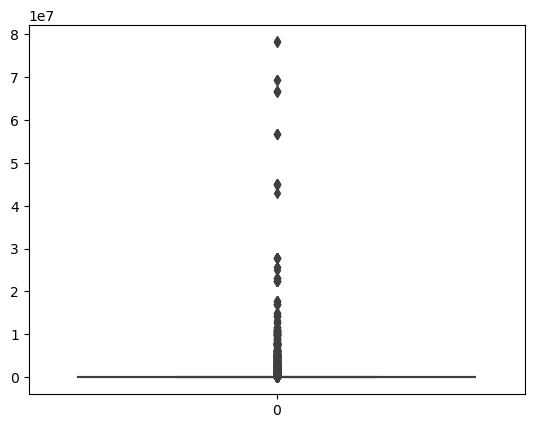

In [28]:
sns.boxplot(inp0.Reviews)
plt.show()

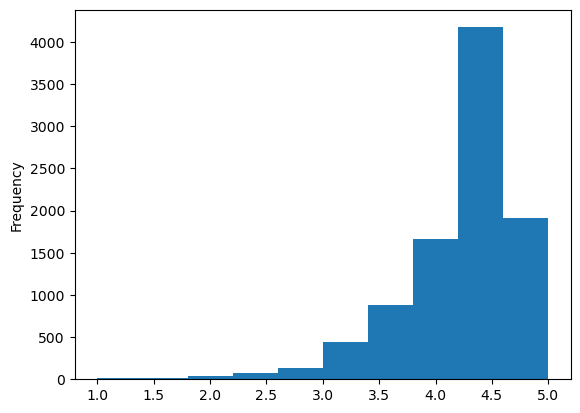

In [29]:
inp0.Rating.plot.hist()
plt.show()

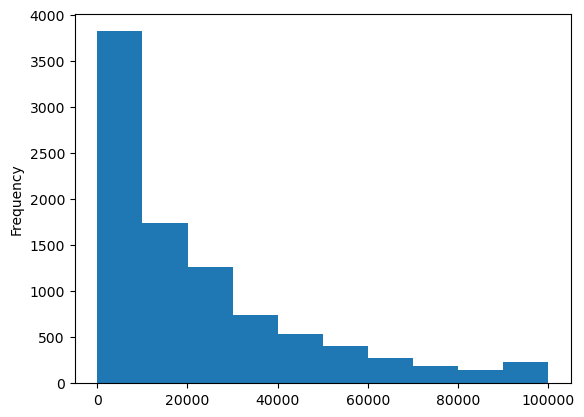

In [30]:
inp0['Size'].plot.hist()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


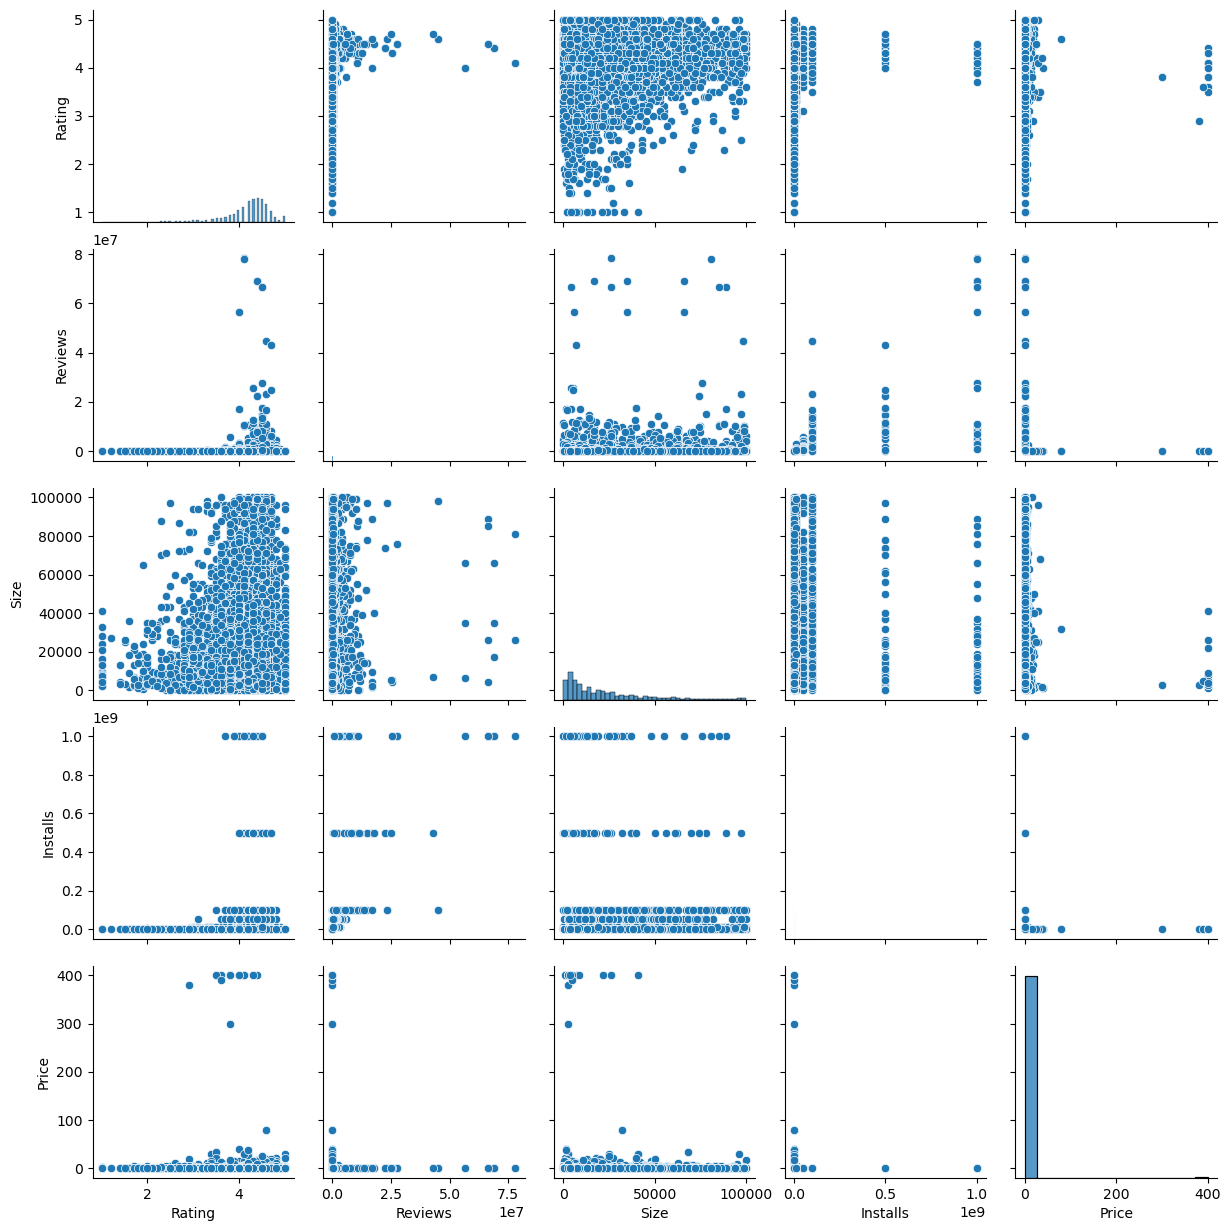

In [31]:
sns.pairplot(data=inp0)

In [32]:
len(inp0[inp0.Price > 200])

15

In [33]:
inp0[inp0.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [34]:
inp0 = inp0[inp0.Reviews <= 2000000]
inp0.shape

(8900, 13)

In [35]:
inp0.Installs.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [36]:
len(inp0[inp0.Installs >= 1000000000])

6

In [37]:
inp0 = inp0[inp0.Installs < 1000000000].copy()
inp0.shape

(8894, 13)

In [38]:
import warnings
warnings.filterwarnings("ignore")

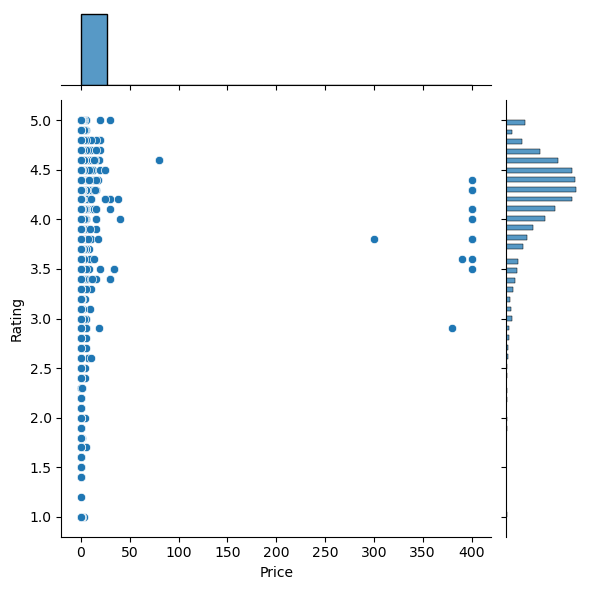

In [39]:
sns.jointplot(x=inp0.Price, y=inp0.Rating)

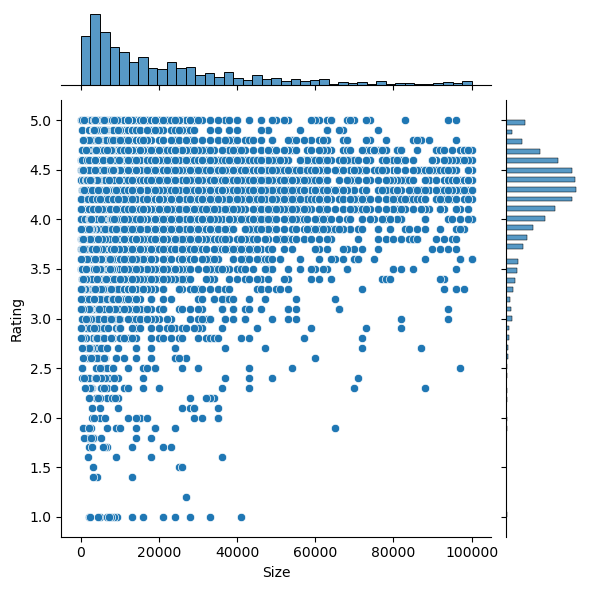

In [40]:
sns.jointplot(x=inp0.Size, y=inp0.Rating)

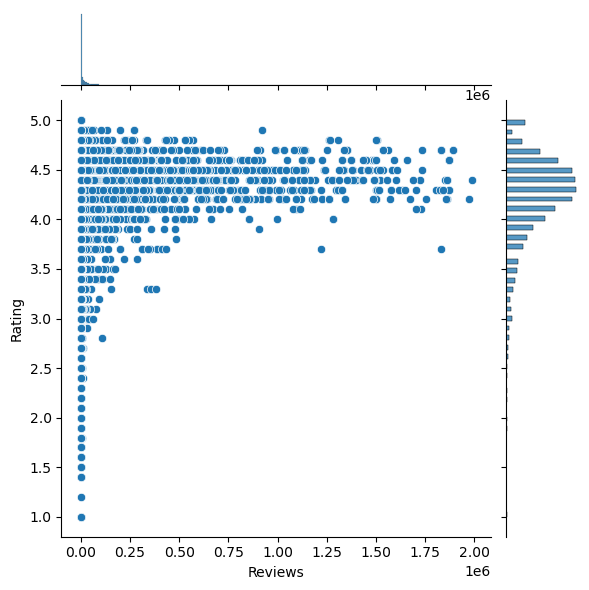

In [41]:
sns.jointplot(x=inp0.Reviews, y=inp0.Rating)

<Axes: xlabel='Content_Rating', ylabel='Rating'>

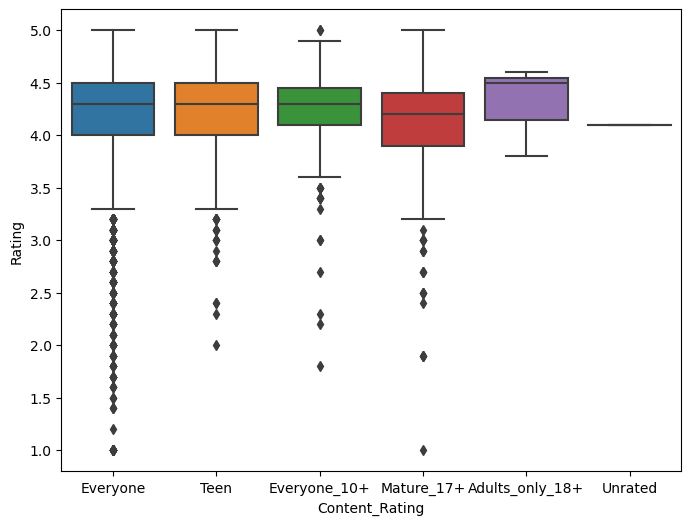

In [42]:
plt.figure(figsize=[8,6])
sns.boxplot(x=inp0['Content_Rating'], y=inp0.Rating)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

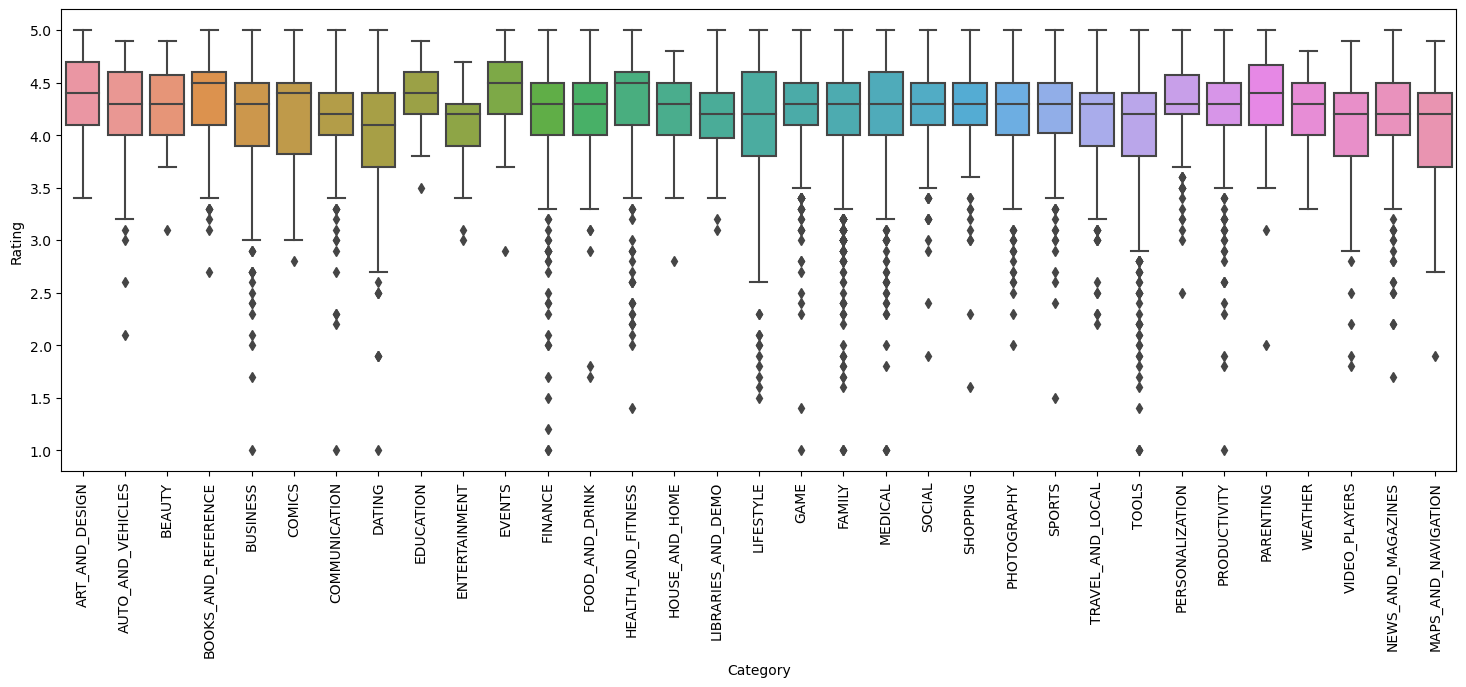

In [43]:
plt.figure(figsize=[18,6])
g = sns.boxplot(x=inp0.Category,y= inp0.Rating)
plt.xticks(rotation=90)

In [44]:
inp1 = inp0.copy()

In [45]:
inp0.Installs.describe()

count    8.894000e+03
mean     5.586450e+06
std      2.419107e+07
min      5.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      5.000000e+08
Name: Installs, dtype: float64

In [46]:
inp1.Installs = inp1.Installs.apply(np.log1p)

In [47]:
inp1.Reviews = inp1.Reviews.apply(np.log1p)

In [48]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [49]:
inp1.drop(["App", "Last Updated", "Current Ver", "Android Ver"], axis=1, inplace=True)
inp1.shape

(8894, 9)

In [50]:
inp2 = pd.get_dummies(inp1, drop_first=True)

In [51]:
inp2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools_Education', 'Genres_Travel_&_Local',
       'Genres_Travel_&_Local_Action_&_Adventure', 'Genres_Trivia',
       'Genres_Video_Players_&_Editors',
       'Genres_Video_Players_&_Editors_Creativity',
       'Genres_Video_Players_&_Editors_Music_&_Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=157)

In [52]:
inp2.shape

(8894, 157)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
df_train, df_test = train_test_split(inp2, train_size = 0.7, random_state = 100)

In [55]:
df_train.shape, df_test.shape

((6225, 157), (2669, 157))

In [56]:
y_train = df_train.pop("Rating")
X_train = df_train

In [57]:
X_train.head(1)

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
10398,3.713572,13000.0,8.517393,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
y_test = df_test.pop("Rating")
X_test = df_test

In [59]:
X_test.head(1)

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
2320,7.604396,69000.0,10.819798,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
import statsmodels.api as sm

In [61]:
model1 = sm.OLS(y_train, X_train.astype(float))

In [62]:
model1 = model1.fit()

In [63]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              3858.
Date:                Mon, 20 Nov 2023   Prob (F-statistic):                        0.00
Time:                        20:55:36   Log-Likelihood:                         -4175.7
No. Observations:                6225   AIC:                                      8599.
Df Residuals:                    6101   BIC:                                      9435.
Df Model:                         124                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Reviews                                          0.1720      0.006     27.977      0.000       0.160       0.184
Size                                         -4.283e-07   3.27e-07     -1.311      0.190   -1.07e-06    2.12e-07
Installs                                        -0.1460      0.006    -24.006      0.000      -0.158      -0.134
Price                                           -0.0004      0.000     -1.153      0.249      -0.001       0.000
Category_AUTO_AND_VEHICLES                       1.9291      0.130     14.848      0.000       1.674       2.184
Category_BEAUTY                                  1.9767      0.133     14.877      0.000       1.716       2.237
Category_BOOKS_AND_REFERENCE                     1.9443      0.127     15.256      0.000       1.694       2.194
Category_BUSINESS                                1.8690      0.126     14.775      0.000       1.621       2.117
Category_COMICS                                  2.6970      0.229     11.767      0.000       2.248       3.146
Category_COMMUNICATION                           1.8342      0.127     14.462      0.000       1.586       2.083
Category_DATING                                  1.7573      0.128     13.746      0.000       1.507       2.008
Category_EDUCATION                               3.4392      0.263     13.063      0.000       2.923       3.955
Category_ENTERTAINMENT                           3.3440      0.263     12.705      0.000       2.828       3.860
Category_EVENTS                                  2.0262      0.132     15.400      0.000       1.768       2.284
Category_FAMILY                                  3.4702      0.256     13.547      0.000       2.968       3.972
Category_FINANCE                                 1.8359      0.126     14.530      0.000       1.588       2.084
Category_FOOD_AND_DRINK                          1.8543      0.128     14.459      0.000       1.603       2.106
Category_GAME                                    3.6747      0.252     14.566      0.000       3.180       4.169
Category_HEALTH_AND_FITNESS                      1.8875      0.127     14.910      0.000       1.639       2.136
Category_HOUSE_AND_HOME                          1.8695      0.130     14.404      0.000       1.615       2.124
Category_LIBRARIES_AND_DEMO                      1.9068      0.130     14.667      0.000       1.652       2.162
Category_LIFESTYLE                               1.8620      0.126     14.728      0.000       1.614       2.110
Category_MAPS_AND_NAVIGATION                     1.8060      0.128     14.119      0.000       1.555       2.057
Category_MEDICAL                              

In [64]:
import sklearn.metrics as metrics
y_test_pred= model1.predict(X_test)

In [65]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

0.5140252120234623


In [66]:
def MPE(y_test_pred,y_test):
    return ( ((y_test - y_test_pred) / y_test).mean()) * 100

print ('MPE: ' + str(MPE(y_test_pred,y_test)) )

MPE: -2.7707196649220864


In [67]:
def MAPE(y_test_pred,y_test):
    return np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
print ('MAPE: ' + str(MAPE(y_test_pred,y_test)) )

MAPE: 9.959893283529905


In [68]:
inp3 = inp2[['Rating','Reviews','Installs','Category_AUTO_AND_VEHICLES','Category_BEAUTY',
             'Category_BOOKS_AND_REFERENCE','Category_BUSINESS','Category_COMICS',
             'Category_COMMUNICATION','Category_DATING','Category_EDUCATION','Category_EDUCATION',
             'Category_ENTERTAINMENT','Category_EVENTS','Category_FAMILY','Category_FINANCE',
             'Category_FOOD_AND_DRINK','Category_GAME','Category_HEALTH_AND_FITNESS',
             'Category_HOUSE_AND_HOME','Category_LIBRARIES_AND_DEMO','Category_LIFESTYLE',
             'Category_MAPS_AND_NAVIGATION','Category_MEDICAL','Category_NEWS_AND_MAGAZINES',
             'Category_PARENTING','Category_PERSONALIZATION','Category_PHOTOGRAPHY','Category_PRODUCTIVITY',
             'Category_SHOPPING','Category_SOCIAL','Category_SPORTS','Category_TOOLS','Category_TRAVEL_AND_LOCAL',
             'Category_VIDEO_PLAYERS','Category_WEATHER','Type_Paid','Content_Rating_Everyone',
             'Content_Rating_Everyone_10+','Content_Rating_Mature_17+','Content_Rating_Teen','Content_Rating_Unrated',
             'Genres_Art_&_Design','Genres_Art_&_Design_Creativity','Genres_Art_&_Design_Pretend_Play',
             'Genres_Auto_&_Vehicles','Genres_Beauty','Genres_Board_Brain_Games','Genres_Books_&_Reference',
             'Genres_Business','Genres_Casual','Genres_Casual_Action_&_Adventure','Genres_Casual_Brain_Games',
             'Genres_Casual_Pretend_Play','Genres_Comics','Genres_Comics_Creativity','Genres_Communication',
             'Genres_Dating','Genres_Education','Genres_Education_Action_&_Adventure','Genres_Education_Creativity',
             'Genres_Education_Education','Genres_Education_Pretend_Play','Genres_Educational_Education',
             'Genres_Educational_Pretend_Play','Genres_Entertainment','Genres_Entertainment_Brain_Games',
             'Genres_Entertainment_Creativity','Genres_Entertainment_Music_&_Video','Genres_Events',
             'Genres_Finance','Genres_Food_&_Drink','Genres_Health_&_Fitness','Genres_House_&_Home',
             'Genres_Libraries_&_Demo','Genres_Lifestyle','Genres_Maps_&_Navigation','Genres_Medical',
             'Genres_Music_Music_&_Video','Genres_News_&_Magazines','Genres_Parenting','Genres_Parenting_Education',
             'Genres_Parenting_Music_&_Video','Genres_Personalization','Genres_Photography','Genres_Productivity',
             'Genres_Puzzle','Genres_Puzzle_Brain_Games','Genres_Racing_Action_&_Adventure','Genres_Role_Playing',
             'Genres_Shopping','Genres_Simulation','Genres_Simulation_Action_&_Adventure','Genres_Social',
             'Genres_Strategy','Genres_Tools','Genres_Tools_Education','Genres_Travel_&_Local',
             'Genres_Travel_&_Local_Action_&_Adventure','Genres_Weather']]

In [69]:
inp3.dtypes

Rating                                      float64
Reviews                                     float64
Installs                                    float64
Category_AUTO_AND_VEHICLES                     bool
Category_BEAUTY                                bool
                                             ...   
Genres_Tools                                   bool
Genres_Tools_Education                         bool
Genres_Travel_&_Local                          bool
Genres_Travel_&_Local_Action_&_Adventure       bool
Genres_Weather                                 bool
Length: 100, dtype: object

In [70]:
inp3.shape

(8894, 100)

In [71]:
df_train, df_test = train_test_split(inp3, train_size = 0.7, random_state = 100)

In [72]:
df_train.shape, df_test.shape

((6225, 100), (2669, 100))

In [73]:
y_train1 = df_train.pop("Rating")
X_train1 = df_train

In [74]:
X_train1.head(1)

,Reviews,Installs,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,...,Genres_Shopping,Genres_Simulation,Genres_Simulation_Action_&_Adventure,Genres_Social,Genres_Strategy,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Weather
10398,3.713572,8.517393,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
y_test1 = df_test.pop("Rating")
X_test1 = df_test

In [76]:
X_test1.head(1)

,Reviews,Installs,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,...,Genres_Shopping,Genres_Simulation,Genres_Simulation_Action_&_Adventure,Genres_Social,Genres_Strategy,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Weather
2320,7.604396,10.819798,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [77]:
model2 = sm.OLS(y_train1, X_train1.astype(float))

In [78]:
model2 = model2.fit()

In [79]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              6754.
Date:                Mon, 20 Nov 2023   Prob (F-statistic):                        0.00
Time:                        21:02:18   Log-Likelihood:                         -4194.7
No. Observations:                6225   AIC:                                      8531.
Df Residuals:                    6154   BIC:                                      9010.
Df Model:                          71                                                  
Covariance Type:            nonrobust                                                  
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Reviews                                      0.1705      0.006     28.102      0.000       0.159       0.182
Installs                                    -0.1445      0.006    -23.970      0.000      -0.156      -0.133
Category_AUTO_AND_VEHICLES                   1.9031      0.130     14.695      0.000       1.649       2.157
Category_BEAUTY                              1.9525      0.132     14.740      0.000       1.693       2.212
Category_BOOKS_AND_REFERENCE                 1.9213      0.127     15.123      0.000       1.672       2.170
Category_BUSINESS                            1.8444      0.126     14.629      0.000       1.597       2.092
Category_COMICS                              2.6672      0.229     11.662      0.000       2.219       3.116
Category_COMMUNICATION                       1.8106      0.126     14.324      0.000       1.563       2.058
Category_DATING                              1.7386      0.127     13.636      0.000       1.489       1.989
Category_EDUCATION                           1.7797      0.129     13.759      0.000       1.526       2.033
Category_EDUCATION                           1.7797      0.129     13.759      0.000       1.526       2.033
Category_ENTERTAINMENT                       3.4664      0.259     13.405      0.000       2.959       3.973
Category_EVENTS                              2.0030      0.131     15.268      0.000       1.746       2.260
Category_FAMILY                              3.5873      0.252     14.255      0.000       3.094       4.081
Category_FINANCE                             1.8090      0.126     14.366      0.000       1.562       2.056
Category_FOOD_AND_DRINK                      1.8283      0.128     14.304      0.000       1.578       2.079
Category_GAME                                3.6377      0.251     14.508      0.000       3.146       4.129
Category_HEALTH_AND_FITNESS                  1.8614      0.126     14.753      0.000       1.614       2.109
Category_HOUSE_AND_HOME                      1.8442      0.129     14.256      0.000       1.591       2.098
Category_LIBRARIES_AND_DEMO                  1.8819      0.130     14.522      0.000       1.628       2.136
Category_LIFESTYLE                           1.8373      0.126     14.579      0.000       1.590       2.084
Category_MAPS_AND_NAVIGATION                 1.7814      0.127     13.973      0.000       1.531       2.031
Category_MEDICAL                             1.8692      0.126     14.855      0.000       1.623       2.116
Category_NEWS_AND_MAGAZINES                  1.8021      0.126     14.252      0.000       1.554       2.050
Category_PARENTING                       

In [80]:
import sklearn.metrics as metrics
y_test_pred1= model2.predict(X_test1)
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred1)))

0.5142331897543194


In [81]:
def MAPE(y_test_pred1,y_test1):
    return np.mean(np.abs((y_test1 - y_test_pred1) / y_test1)) * 100
print ('MAPE: ' + str(MAPE(y_test_pred1,y_test1)) )

MAPE: 9.957515950460463
